# 游늵 Caso: Control de Proceso en `Quality Associates, Inc.`  

Quality Associates, Inc., una firma consultora especializada en **estad칤stica aplicada y control de calidad**, fue contratada por una empresa de manufactura que buscaba asegurar la estabilidad de su proceso de producci칩n.  

En la primera fase de la asesor칤a, el cliente proporcion칩 una **muestra hist칩rica de 800 observaciones** obtenidas cuando el proceso estaba operando en condiciones satisfactorias. El an치lisis de estos datos revel칩 que la **desviaci칩n est치ndar del proceso era de 0.21**. Dado el tama침o de la muestra, se consider칩 razonable tratar este valor como la **desviaci칩n est치ndar poblacional**.  

Con esta informaci칩n, Quality Associates recomend칩 implementar un **plan de monitoreo peri칩dico**: tomar **muestras aleatorias de tama침o 30** a intervalos regulares. El objetivo era que, a partir de estas muestras, la empresa pudiera determinar r치pidamente si el proceso continuaba en control o si, por el contrario, deb칤a intervenirse para corregir desviaciones.  

De acuerdo con las **especificaciones de producci칩n**, la media del proceso deb칤a mantenerse en **12 unidades**. Para evaluar esto, los consultores propusieron la siguiente prueba de hip칩tesis:  

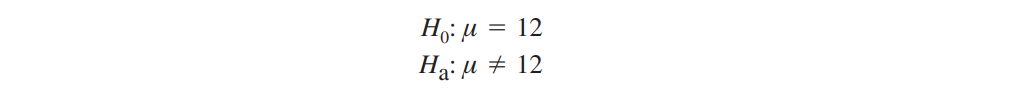

Bajo este esquema, **si se rechazaba $Ho$** en alg칰n an치lisis, se deb칤an tomar de inmediato medidas correctivas para investigar y eliminar la causa del problema.  

El nuevo procedimiento de control comenz칩 a aplicarse desde el primer d칤a, tomando **muestras cada hora** durante la jornada laboral. Estos datos conforman el conjunto denominado **Quality**, el cual constituye la base para aplicar las pruebas estad칤sticas y verificar si el proceso se mantiene bajo control.  

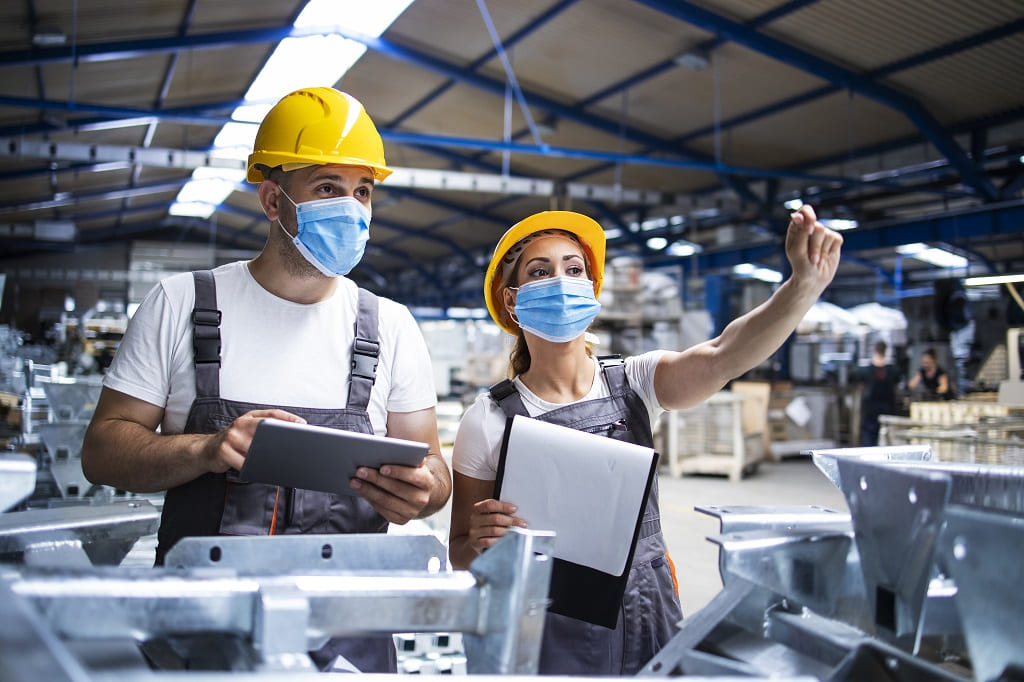


### 1. Evaluaci칩n de muestras mediante pruebas de hip칩tesis  
Para cada una de las muestras recolectadas durante el primer d칤a de implementaci칩n, se deber치 aplicar una **prueba de hip칩tesis bilateral** con un **nivel de significancia de 0.01**.  
El an치lisis debe incluir:  
- El **estad칤stico de prueba** calculado.  
- El **valor-p** asociado.  
- La **decisi칩n final** respecto a la hip칩tesis nula.  
- Las **medidas correctivas** a aplicar en caso de rechazo de \(H_0\).


In [65]:
from io import StringIO
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [66]:
# Datos de ejemplo
# Estos datos representan las muestras de un proceso de producci칩n
# Cada columna representa una muestra tomada en diferentes momentos
# Las filas representan las mediciones de cada muestra
data = StringIO(""" 
Muestra_1,Muestra_2,Muestra_3,Muestra_4
11.55,11.62,11.91,12.02
11.62,11.69,11.36,12.02
11.52,11.59,11.75,12.05
11.75,11.82,11.95,12.18
11.90,11.97,12.14,12.11
11.64,11.71,11.72,12.07
11.80,11.87,11.61,12.05
12.03,12.10,11.85,11.64
11.94,12.01,12.16,12.39
11.92,11.99,11.91,11.65
12.13,12.20,12.12,12.11
12.09,12.16,11.61,11.90
11.93,12.00,12.21,12.22
12.21,12.28,11.56,11.88
12.32,12.39,11.95,12.03
11.93,12.00,12.01,12.35
11.85,11.92,12.06,12.09
11.76,11.83,11.76,11.77
12.16,12.23,11.82,12.20
11.77,11.84,12.12,11.79
12.00,12.07,11.60,12.30
12.04,12.11,11.95,12.27
11.98,12.05,11.96,12.29
12.30,12.37,12.22,12.47
12.18,12.25,11.75,12.03
11.97,12.04,11.96,12.17
12.17,12.24,11.95,11.94
11.85,11.92,11.89,11.97
12.30,12.37,11.88,12.23
12.15,12.22,11.93,12.25
""")

# Cargar los datos en un DataFrame
data = pd.read_csv(data, sep=',')
data

Muestra_1  Muestra_2  Muestra_3  Muestra_4
0       11.55      11.62      11.91      12.02
1       11.62      11.69      11.36      12.02
2       11.52      11.59      11.75      12.05
3       11.75      11.82      11.95      12.18
4       11.90      11.97      12.14      12.11
5       11.64      11.71      11.72      12.07
6       11.80      11.87      11.61      12.05
7       12.03      12.10      11.85      11.64
8       11.94      12.01      12.16      12.39
9       11.92      11.99      11.91      11.65
10      12.13      12.20      12.12      12.11
11      12.09      12.16      11.61      11.90
12      11.93      12.00      12.21      12.22
13      12.21      12.28      11.56      11.88
14      12.32      12.39      11.95      12.03
15      11.93      12.00      12.01      12.35
16      11.85      11.92      12.06      12.09
17      11.76      11.83      11.76      11.77
18      12.16      12.23      11.82      12.20
19      11.77      11.84      12.12      11.79
20      12.00      12.07      11.60      12.30
21      12.04      12.11      11.95      12.27
22      11.98      12.05      11.96      12.29
23      12.30      12.37      12.22      12.47
24      12.18      12.25      11.75      12.03
25      11.97      12.04      11.96      12.17
26      12.17      12.24      11.95      11.94
27      11.85      11.92      11.89      11.97
28      12.30      12.37      11.88      12.23
29      12.15      12.22      11.93      12.25

In [67]:
data.info() # Informaci칩n sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Muestra_1  30 non-null     float64
 1   Muestra_2  30 non-null     float64
 2   Muestra_3  30 non-null     float64
 3   Muestra_4  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [68]:
data.describe() # Estad칤sticas descriptivas de las muestras

Muestra_1  Muestra_2  Muestra_3  Muestra_4
count  30.000000  30.000000  30.000000  30.000000
mean   11.958667  12.028667  11.889000  12.081333
std     0.220356   0.220356   0.207171   0.206109
min    11.520000  11.590000  11.360000  11.640000
25%    11.812500  11.882500  11.752500  11.982500
50%    11.955000  12.025000  11.920000  12.080000
75%    12.145000  12.215000  11.997500  12.227500
max    12.320000  12.390000  12.220000  12.470000

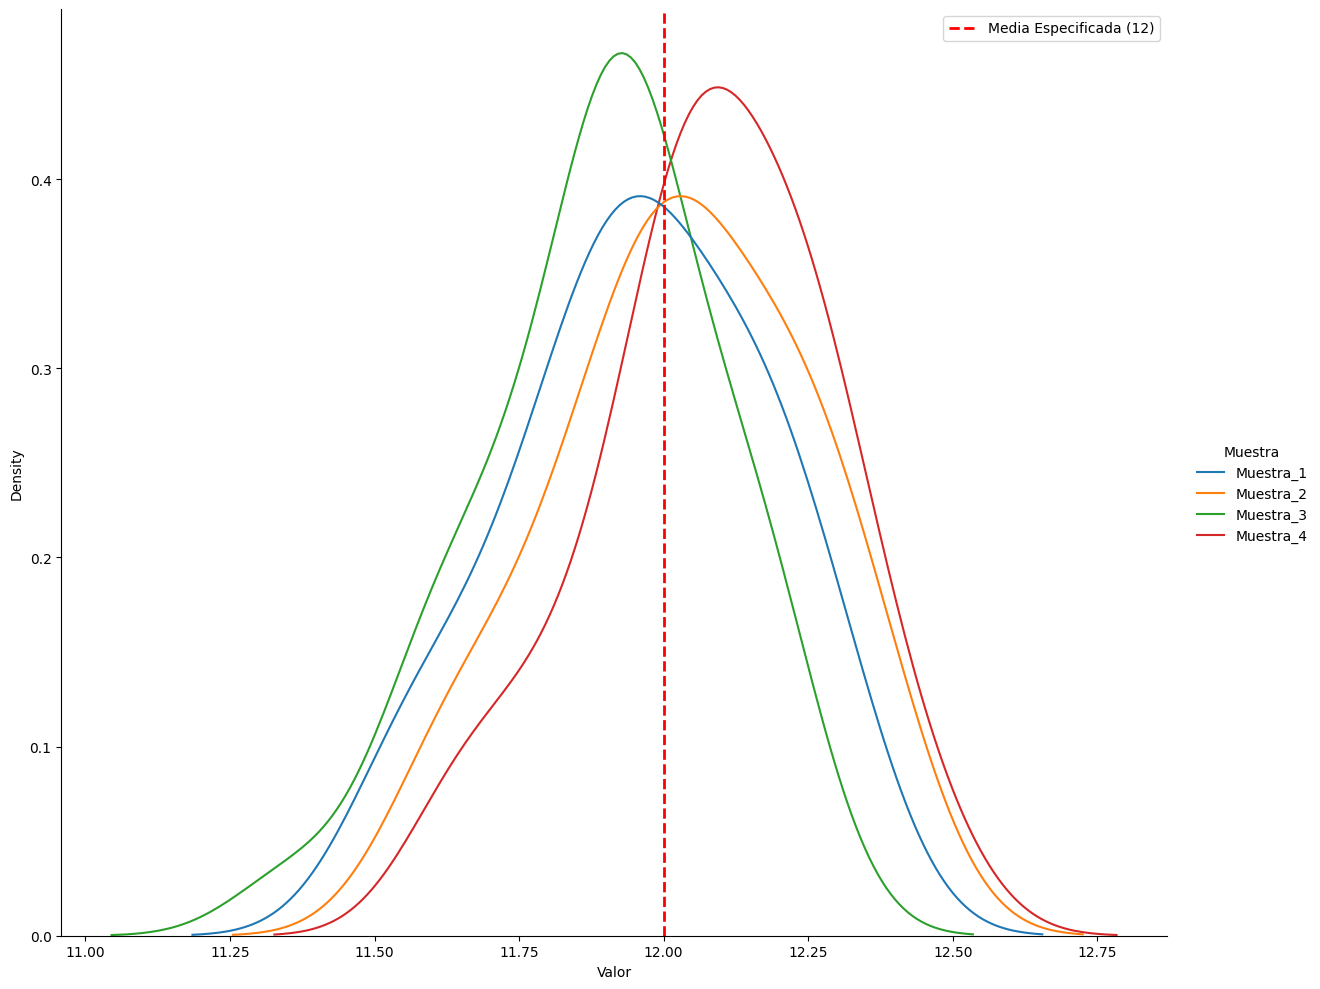

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

df_long = data.melt(var_name="Muestra", value_name="Valor")

# Graficamos solo las curvsas de densidad
sns.displot(
    data=df_long,
    x="Valor",
    hue="Muestra",
    kind="kde",
    fill=False,
    height=10,
    aspect=1.2
)

# L칤nea vertical en la media conocida (12)
plt.axvline(12, color="red", linestyle="--", linewidth=2, label="Media Especificada (12)")
plt.legend()
plt.show()


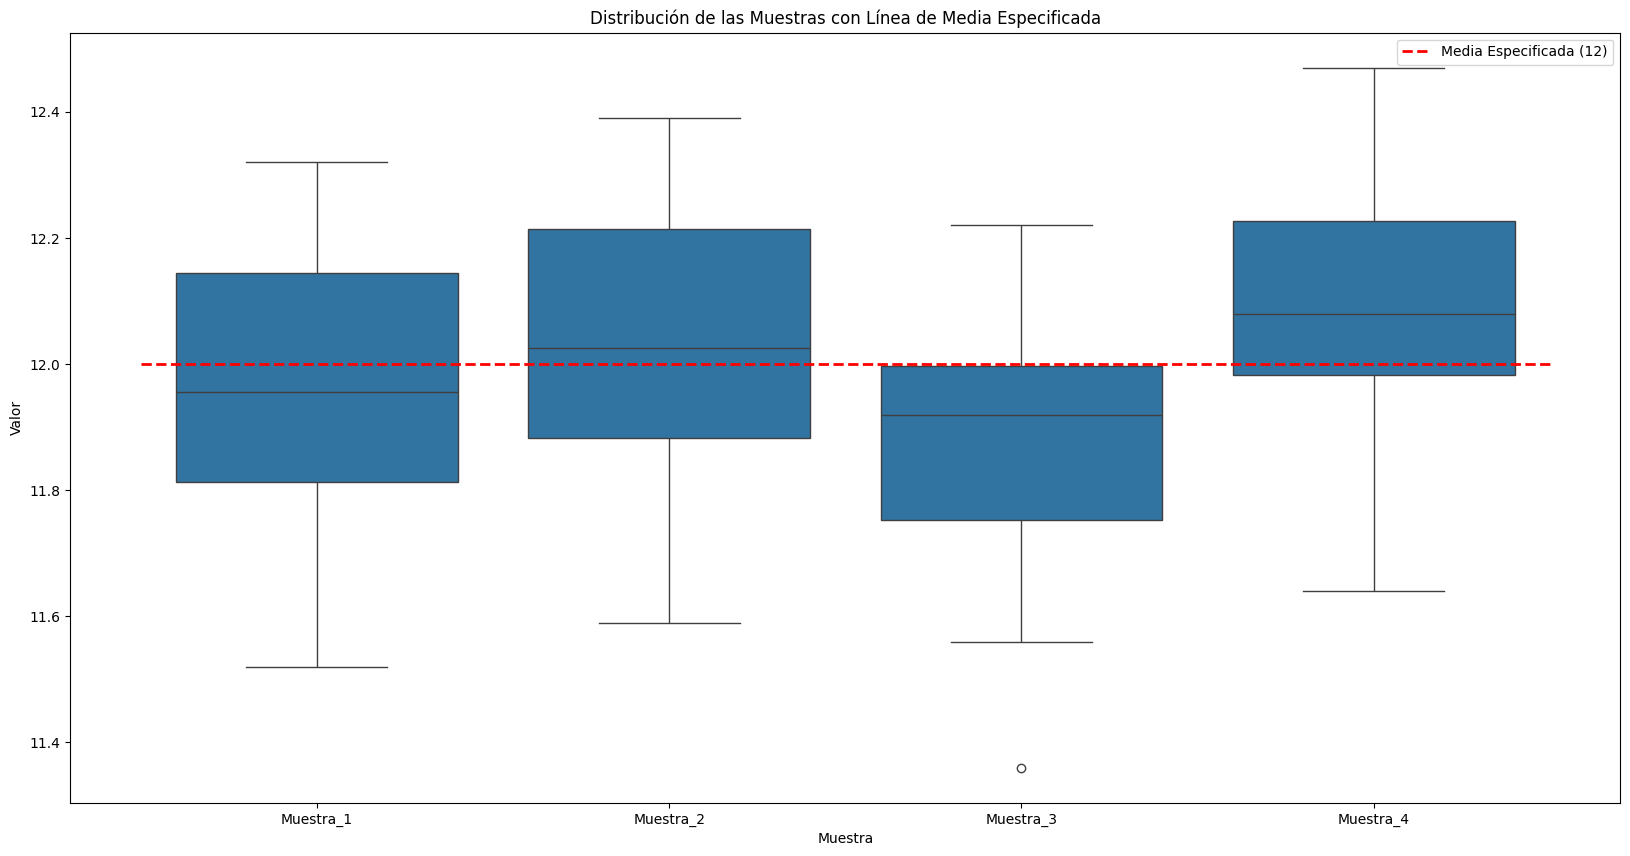

In [70]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_long, x="Muestra", y="Valor")
plt.hlines(y=12, xmin=-0.5, xmax=len(df_long["Muestra"].unique())-0.5, color="red", linestyle="--", linewidth=2, label="Media Especificada (12)")
plt.title("Distribuci칩n de las Muestras con L칤nea de Media Especificada")
plt.legend()
plt.show()

In [71]:
# Crear una funci칩n para probar la hip칩tesis

def prueba_muestra(muestra, sigma, mu0=12, alpha=0.01):
    n = len(muestra) # Definimos el tama침o de la muestra
    mean = np.mean(muestra) # Esta es la media muestral
    error_std = sigma / np.sqrt(n) # El error est치ndar

    # Estad칤stico de prueba
    z_score = (mean - mu0) / error_std # C치lculo del Z-score

    # Valor p (prueba bilateral) , donde en este caso es una prueba de hip칩tesis de toma de decisiones ya que se quiere tomar medidas correctivas si se rechaza H0
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Intervalo de confianza (95%)
    ci_inf = mean - 1.96 * error_std
    ci_sup = mean + 1.96 * error_std

    # Decisi칩n
    decision = "Rechazar H0" if p_value < alpha else "No Rechazar H0"

    return {
        "Media Muestral": round(mean, 3),
        "Desv.Est.Muestral": round(np.std(muestra, ddof=1), 3),
        "Z-Score": round(z_score, 3),
        "p-value": round(p_value, 4),
        "Intervalo 95%": f"[{ci_inf:.2f}, {ci_sup:.2f}]",
        "Decisi칩n": decision
    }


In [72]:
resultados = pd.DataFrame([
    prueba_muestra(data[col], 0.21, mu0=12, alpha=0.01) for col in data.columns
], index=data.columns)
resultados

Media Muestral  Desv.Est.Muestral  Z-Score  p-value  \
Muestra_1          11.959              0.220   -1.078   0.2810   
Muestra_2          12.029              0.220    0.748   0.4547   
Muestra_3          11.889              0.207   -2.895   0.0038   
Muestra_4          12.081              0.206    2.121   0.0339   

            Intervalo 95%        Decisi칩n  
Muestra_1  [11.88, 12.03]  No Rechazar H0  
Muestra_2  [11.95, 12.10]  No Rechazar H0  
Muestra_3  [11.81, 11.96]     Rechazar H0  
Muestra_4  [12.01, 12.16]  No Rechazar H0

/var/data/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


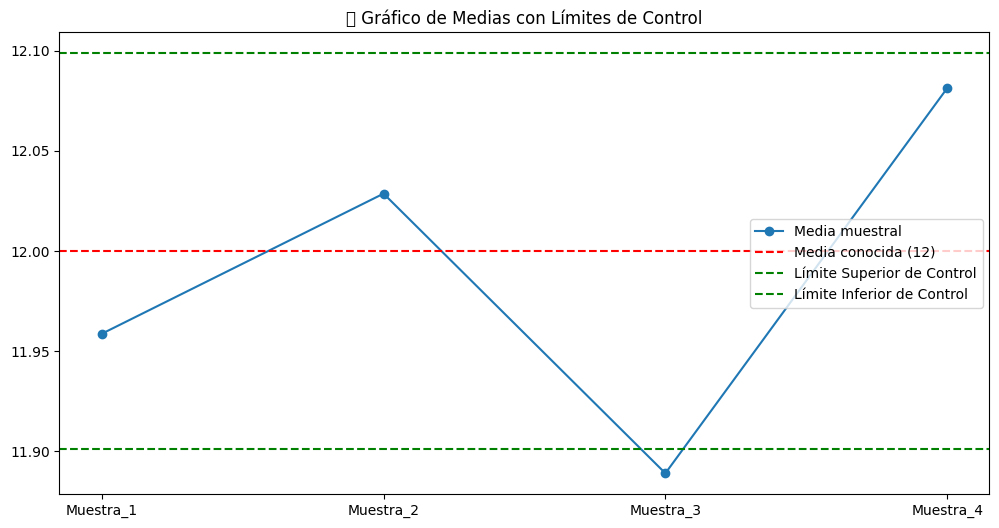

In [73]:
# C치lculo de l칤mites de control para medias (con sigma poblacional)
n = 30
desviacion_poblacional_conocida = 0.21
media_conocida = 12
z_alpha = norm.ppf(1 - 0.005)  # para alfa=0.01 bilateral -> 0.005 en cada cola
error_std = desviacion_poblacional_conocida / np.sqrt(n)

UCL = media_conocida + z_alpha * error_std
LCL = media_conocida - z_alpha * error_std

# Calcular medias muestrales
medias = data.mean()

plt.figure(figsize=(12,6))
plt.plot(medias, marker='o', linestyle='-', label="Media muestral")
plt.axhline(mu0, color="red", linestyle="--", label="Media conocida (12)")
plt.axhline(UCL, color="green", linestyle="--", label="L칤mite Superior de Control")
plt.axhline(LCL, color="green", linestyle="--", label="L칤mite Inferior de Control")
plt.title("游늵 Gr치fico de Medias con L칤mites de Control")
plt.legend(loc="center right")
plt.show()


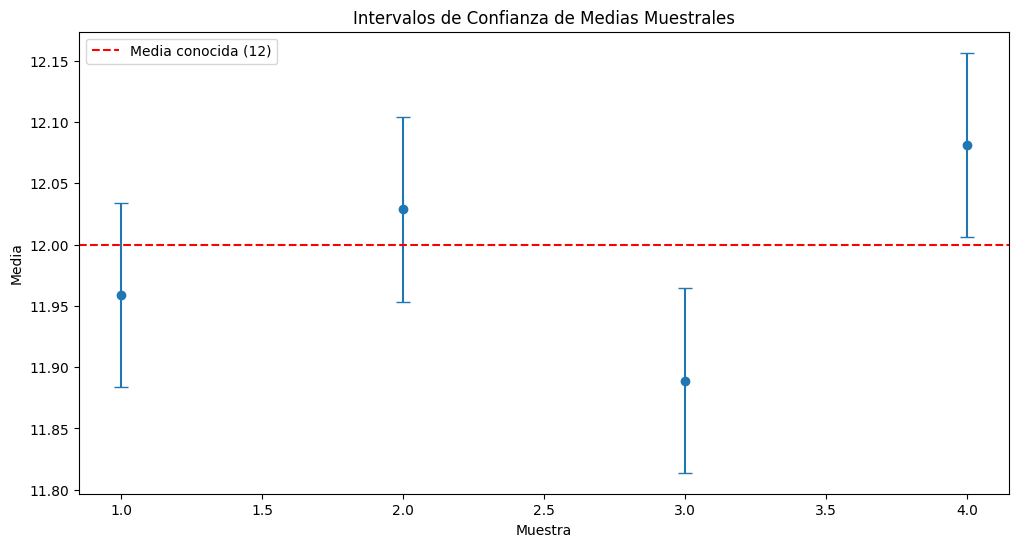

In [74]:
plt.figure(figsize=(12,6))
plt.errorbar(x=range(1, len(medias)+1),
             y=medias,
             yerr=1.96*error_std,
             fmt='o',
             capsize=5)
plt.axhline(mu0, color="red", linestyle="--", label="Media conocida (12)")
plt.title("Intervalos de Confianza de Medias Muestrales")
plt.xlabel("Muestra")
plt.ylabel("Media")
plt.legend()
plt.show()


### 2. An치lisis de la variabilidad de las muestras  
Se calcular치 la **desviaci칩n est치ndar** de cada una de las cuatro muestras observadas.  
El objetivo es contrastar dichos valores con la desviaci칩n est치ndar poblacional **픢 = 0.21**, a fin de determinar si resulta razonable mantener este valor como par치metro representativo de la variabilidad del proceso.

In [75]:
data.apply(lambda x: x.std())

Muestra_1    0.220356
Muestra_2    0.220356
Muestra_3    0.207171
Muestra_4    0.206109
dtype: float64

In [76]:
print(data.apply(lambda x: x.std(), axis = 0).to_frame().reset_index(drop=True).mean())
print("""
      Observamos que la desviaci칩n est치ndar de las muestras es de 0.213498, lo cual es consistente con la desviaci칩n est치ndar poblacional de 0.21.
      """)

0    0.213498
dtype: float64

      Observamos que la desviaci칩n est치ndar de las muestras es de 0.213498, lo cual es consistente con la desviaci칩n est치ndar poblacional de 0.21.
      
